In [ ]:
# How to engineer factors using pandas and NumPy

import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

from datetime import datetime
import pandas as pd
import pandas_datareader.data as web

# replaces pyfinance.ols.PandasRollingOLS (no longer maintained)
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from talib import RSI, BBANDS
from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
idx = pd.IndexSlice

"Portfolio Optimization and Performance Evaluation"

In a portfolio context, positive asset returns can offset negative price movements. Positive price changes for one asset are more likely to offset losses on another the lower the correlation between the two positions. Based on how portfolio risk depends on the positions’ covariance, Harry Markowitz developed the theory behind modern portfolio management based on diversification in 1952. The result is mean-variance optimization that selects weights for a given set of assets to minimize risk, measured as the standard deviation of returns for a given expected return.

"How to manage Portfolio Risk & Return"

Mean-variance optimization
Modern portfolio theory solves for the optimal portfolio weights to minimize volatility for a given expected return, or maximize returns for a given level of volatility. The key requisite inputs are expected asset returns, standard deviations, and the covariance matrix.

"How it works"

Diversification works because the variance of poftfolio returns depends on the covariance of the assets.

The 1/N portfolio
Simple portfolios providae useful benchmarks to gauge the added value of complex models that generate the risk of overfitting. The simplest strategy—an equally-weighted portfolio—has been shown to be one of the best performers.

The minimum-variance portfolio
Another alternative is the global minimum-variance (GMV) portfolio, which prioritizes the minimization of risk. It is shown in the efficient frontier figure and can be calculated as follows by minimizing the portfolio standard deviation using the mean-variance framework.


"How to size your bets – the Kelly rule"

The Kelly rule has a long history in gambling because it provides guidance on how much to stake on each of an (infinite) sequence of bets with varying (but favorable) odds to maximize terminal wealth. It was published as A New Interpretation of the Information Rate in 1956 by John Kelly who was a colleague of Claude Shannon's at Bell Labs. He was intrigued by bets placed on candidates at the new quiz show The $64,000 Question, where a viewer on the west coast used the three-hour delay to obtain insider information about the winners.

Kelly drew a connection to Shannon's information theory to solve for the bet that is optimal for long-term capital growth when the odds are favorable, but uncertainty remains. His rule maximizes logarithmic wealth as a function of the odds of success of each game, and includes implicit bankruptcy protection since log(0) is negative infinity so that a Kelly gambler would naturally avoid losing everything



## Returns Analysis

Testing a trading strategy involves backtesting against historical data to fine-tune alpha factor parameters, as well as forward-testing against new market data to validate that the strategy performs well out of sample or if the parameters are too closely tailored to specific historical circumstances.

Pyfolio allows for the designation of an out-of-sample period to simulate walk-forward testing. There are numerous aspects to take into account when testing a strategy to obtain statistically reliable results, which we will address here. 

In [11]:
"""Review pyForFin code and impliment similar code"""

'Review pyForFin code and impliment similar code'

In [234]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.neighbors import (KNeighborsClassifier, 
                               KNeighborsRegressor)
from sklearn.model_selection import (cross_val_score, 
                                     cross_val_predict, 
                                     GridSearchCV)
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from yellowbrick.model_selection import ValidationCurve, LearningCurve

## The Machine Learning Process

In [273]:
ratios = pd.read_csv("MLratios_vals_money.csv",
                    index_col=["Ticker","Year", "Close"],
                     #index_col='Ticker',
                     infer_datetime_format=True,
                     parse_dates=True)

In [274]:
ratios

Shares (Basic)  Shares (Diluted)   Revenue  \
Ticker Year       Close                                                
A      2015-01-01 39.602        0.172274          0.168954 -0.106620   
       2016-01-01 43.370        0.162817          0.160931 -0.099310   
       2017-01-01 59.330        0.157412          0.156919 -0.087275   
       2018-01-01 67.169        0.156061          0.155582 -0.067574   
       2019-01-01 75.212        0.146603          0.146222 -0.056475   
...                                  ...               ...       ...   
ZYXI   2015-01-01 0.194        -0.235394         -0.237181 -0.286092   
       2016-01-01 0.295        -0.235394         -0.237181 -0.286017   
       2017-01-01 1.117        -0.234198         -0.234607 -0.285566   
       2018-01-01 3.384        -0.233729         -0.233474 -0.285188   
       2019-01-01 7.544        -0.233816         -0.233581 -0.284584   

                          Cost of Revenue  Gross Profit  Operating Expenses  \
Ticker Year       Close                                                       
A      2015-01-01 39.602         0.127958     -0.036993           -0.000036   
       2016-01-01 43.370         0.127476     -0.015615           -0.013266   
       2017-01-01 59.330         0.123979      0.013437           -0.010326   
       2018-01-01 67.169         0.114091      0.051533           -0.050436   
       2019-01-01 75.212         0.106193      0.067703           -0.072486   
...                                   ...           ...                 ...   
ZYXI   2015-01-01 0.194          0.248061     -0.315766            0.317025   
       2016-01-01 0.295          0.248147     -0.315342            0.317031   
       2017-01-01 1.117          0.248068     -0.314134            0.316924   
       2018-01-01 3.384          0.247995     -0.313138            0.315697   
       2019-01-01 7.544          0.247828     -0.311661            0.313580   

                          Selling, General & Administrative  \
Ticker Year       Close                                       
A      2015-01-01 39.602                          -0.066345   
       2016-01-01 43.370                          -0.084542   
       2017-01-01 59.330                          -0.077718   
       2018-01-01 67.169                          -0.118944   
       2019-01-01 75.212                          -0.143396   
...                                                     ...   
ZYXI   2015-01-01 0.194                            0.269098   
       2016-01-01 0.295                            0.269106   
       2017-01-01 1.117                            0.268960   
       2018-01-01 3.384                            0.267300   
       2019-01-01 7.544                            0.264433   

                          Research & Development  \
Ticker Year       Close                            
A      2015-01-01 39.602               -0.208035   
       2016-01-01 43.370               -0.206883   
       2017-01-01 59.330               -0.218405   
       2018-01-01 67.169               -0.271408   
       2019-01-01 75.212               -0.293300   
...                                          ...   
ZYXI   2015-01-01 0.194                 0.172201   
       2016-01-01 0.295                 0.172201   
       2017-01-01 1.117                 0.172201   
       2018-01-01 3.384                 0.172201   
       2019-01-01 7.544                 0.172201   

                          Depreciation & Amortization_x  \
Ticker Year       Close                                   
A      2015-01-01 39.602                       0.179789   
       2016-01-01 43.370                       0.179789   
       2017-01-01 59.330                       0.179789   
       2018-01-01 67.169                       0.179789   
       2019-01-01 75.212                       0.179789   
...                                                 ...   
ZYXI   2015-01-01 0.194                        0.179789   
       2016-01-01 0.295          

In [275]:
dfClose = ratios.reset_index()

In [276]:
dfClose

,Ticker,Year,Close,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",...,days_sales_in_inven,receivables_turnover_ratio,debt_ratio,debt_to_equ,Interest_coverage_ratio,debt_service_cov_ratio,Asets/Liabili,acid_test,cash_ratio,op_cash_flow_ratio
0,A,2015-01-01,39.602,0.172274,0.168954,-0.106620,0.127958,-0.036993,-0.000036,-0.066345,...,32.012103,74.831496,-2.736367,-2.972502,-0.545721,-0.716723,-0.365448,0.097962,-1.019746,0.555844
1,A,2016-01-01,43.370,0.162817,0.160931,-0.099310,0.127476,-0.015615,-0.013266,-0.084542,...,32.133227,0.127962,-3.045145,-2.736978,-0.373349,-0.544351,-0.328392,0.068886,-1.310792,0.356421
2,A,2017-01-01,59.330,0.157412,0.156919,-0.087275,0.123979,0.013437,-0.010326,-0.077718,...,33.039560,-5.877438,-1.210514,-1.163701,0.093116,0.025217,-0.826095,0.284778,-2.295088,-0.127086
3,A,2018-01-01,67.169,0.156061,0.155582,-0.067574,0.114091,0.051533,-0.050436,-0.118944,...,35.902941,48.262151,-1.851635,-1.582668,0.188853,0.017851,-0.540063,0.465705,-1.527332,-0.326840
4,A,2019-01-01,75.212,0.146603,0.146222,-0.056475,0.106193,0.067703,-0.072486,-0.143396,...,38.573230,2.948680,-1.702791,-0.223005,0.209948,0.341382,-0.587271,3.316033,-2.293193,-2.184114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,ZYXI,2015-01-01,0.194,-0.235394,-0.237181,-0.286092,0.248061,-0.315766,0.317025,0.269098,...,16.512858,-24.211742,1.010211,1.009531,-0.737666,-0.908615,0.989892,-1.173660,0.706759,0.929757
9076,ZYXI,2016-01-01,0.295,-0.235394,-0.237181,-0.286017,0.248147,-0.315342,0.317031,0.269106,...,16.507161,-24.138949,1.010336,1.009517,-0.733750,-0.904694,0.989769,-1.174027,0.706670,0.926194
9077,ZYXI,2017-01-01,1.117,-0.234198,-0.234607,-0.285566,0.248068,-0.314134,0.316924,0.268960,...,16.512385,-23.997822,1.013660,1.013713,-0.733478,-0.904306,0.986525,-1.171549,0.702087,0.914970
9078,ZYXI,2018-01-01,3.384,-0.233729,-0.233474,-0.285188,0.247995,-0.313138,0.315697,0.267300,...,16.517278,-23.915202,1.014313,1.013654,-0.723419,-0.894421,0.985889,-1.171510,0.700080,0.914509


In [277]:
dfClose = dfClose.Close / 100

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


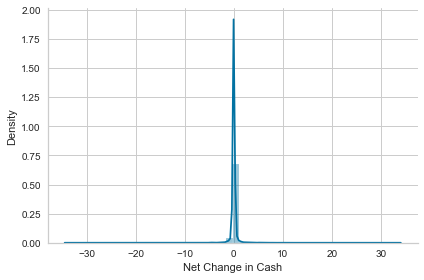

In [278]:
sns.distplot(ratios['Net Change in Cash'])
sns.despine()
plt.tight_layout();

In [279]:
ratios

Shares (Basic)  Shares (Diluted)   Revenue  \
Ticker Year       Close                                                
A      2015-01-01 39.602        0.172274          0.168954 -0.106620   
       2016-01-01 43.370        0.162817          0.160931 -0.099310   
       2017-01-01 59.330        0.157412          0.156919 -0.087275   
       2018-01-01 67.169        0.156061          0.155582 -0.067574   
       2019-01-01 75.212        0.146603          0.146222 -0.056475   
...                                  ...               ...       ...   
ZYXI   2015-01-01 0.194        -0.235394         -0.237181 -0.286092   
       2016-01-01 0.295        -0.235394         -0.237181 -0.286017   
       2017-01-01 1.117        -0.234198         -0.234607 -0.285566   
       2018-01-01 3.384        -0.233729         -0.233474 -0.285188   
       2019-01-01 7.544        -0.233816         -0.233581 -0.284584   

                          Cost of Revenue  Gross Profit  Operating Expenses  \
Ticker Year       Close                                                       
A      2015-01-01 39.602         0.127958     -0.036993           -0.000036   
       2016-01-01 43.370         0.127476     -0.015615           -0.013266   
       2017-01-01 59.330         0.123979      0.013437           -0.010326   
       2018-01-01 67.169         0.114091      0.051533           -0.050436   
       2019-01-01 75.212         0.106193      0.067703           -0.072486   
...                                   ...           ...                 ...   
ZYXI   2015-01-01 0.194          0.248061     -0.315766            0.317025   
       2016-01-01 0.295          0.248147     -0.315342            0.317031   
       2017-01-01 1.117          0.248068     -0.314134            0.316924   
       2018-01-01 3.384          0.247995     -0.313138            0.315697   
       2019-01-01 7.544          0.247828     -0.311661            0.313580   

                          Selling, General & Administrative  \
Ticker Year       Close                                       
A      2015-01-01 39.602                          -0.066345   
       2016-01-01 43.370                          -0.084542   
       2017-01-01 59.330                          -0.077718   
       2018-01-01 67.169                          -0.118944   
       2019-01-01 75.212                          -0.143396   
...                                                     ...   
ZYXI   2015-01-01 0.194                            0.269098   
       2016-01-01 0.295                            0.269106   
       2017-01-01 1.117                            0.268960   
       2018-01-01 3.384                            0.267300   
       2019-01-01 7.544                            0.264433   

                          Research & Development  \
Ticker Year       Close                            
A      2015-01-01 39.602               -0.208035   
       2016-01-01 43.370               -0.206883   
       2017-01-01 59.330               -0.218405   
       2018-01-01 67.169               -0.271408   
       2019-01-01 75.212               -0.293300   
...                                          ...   
ZYXI   2015-01-01 0.194                 0.172201   
       2016-01-01 0.295                 0.172201   
       2017-01-01 1.117                 0.172201   
       2018-01-01 3.384                 0.172201   
       2019-01-01 7.544                 0.172201   

                          Depreciation & Amortization_x  \
Ticker Year       Close                                   
A      2015-01-01 39.602                       0.179789   
       2016-01-01 43.370                       0.179789   
       2017-01-01 59.330                       0.179789   
       2018-01-01 67.169                       0.179789   
       2019-01-01 75.212                       0.179789   
...                                                 ...   
ZYXI   2015-01-01 0.194                        0.179789   
       2016-01-01 0.295          

In [280]:
'''X_all = ratios[['book_value_per_share_ratio',
 'divid_yield_ratio',
 'Earnings_per_share_ratio',
 'price_earnings_ratio',
 'gross_margin_ratios',
 'operating_margin_ratio',
 'ret_on_asser_ratio',
 'return_onEquity_ratio',
 'ave_tot_assets',
 'av_inven',
 'average_accts_receivable',
 'asset_turnover',
 'inventoty_turnover',
 'days_sales_in_inven',
 'receivables_turnover_ratio',
 'debt_ratio',
 'debt_to_equ',
 'Interest_coverage_ratio',
 'debt_service_cov_ratio',
 'Asets/Liabili',
 'acid_test',
 'cash_ratio',
 'op_cash_flow_ratio']][:5]'''


["asset_turnover", "inventoty_turnover"]

['asset_turnover', 'inventoty_turnover']

In [282]:
X_all = ratios.drop(["acid_test", "debt_to_equ", "debt_ratio", "days_sales_in_inven", "receivables_turnover_ratio", "asset_turnover", "inventoty_turnover"], axis=1) 

In [283]:
XAll = X_all[['Shares (Basic)', 'Shares (Diluted)', 'Revenue', 'Cost of Revenue',
       'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization_x', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Net Income/Starting Line', 'Depreciation & Amortization_y',
       'Non-Cash Items', 'Change in Working Capital',
       'Change in Accounts Receivable', 'Change in Inventories',
       'Change in Accounts Payable', 'Change in Other',
       'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash']]

In [307]:
y = np.log(dfClose) / 10


In [308]:
y.fillna(0, inplace=True)

In [309]:
X_all.set_index(ratios.index, inplace=True)

In [310]:
X_all

Shares (Basic)  Shares (Diluted)   Revenue  \
Ticker Year       Close                                                
A      2015-01-01 39.602        0.172274          0.168954 -0.106620   
       2016-01-01 43.370        0.162817          0.160931 -0.099310   
       2017-01-01 59.330        0.157412          0.156919 -0.087275   
       2018-01-01 67.169        0.156061          0.155582 -0.067574   
       2019-01-01 75.212        0.146603          0.146222 -0.056475   
...                                  ...               ...       ...   
ZYXI   2015-01-01 0.194        -0.235394         -0.237181 -0.286092   
       2016-01-01 0.295        -0.235394         -0.237181 -0.286017   
       2017-01-01 1.117        -0.234198         -0.234607 -0.285566   
       2018-01-01 3.384        -0.233729         -0.233474 -0.285188   
       2019-01-01 7.544        -0.233816         -0.233581 -0.284584   

                          Cost of Revenue  Gross Profit  Operating Expenses  \
Ticker Year       Close                                                       
A      2015-01-01 39.602         0.127958     -0.036993           -0.000036   
       2016-01-01 43.370         0.127476     -0.015615           -0.013266   
       2017-01-01 59.330         0.123979      0.013437           -0.010326   
       2018-01-01 67.169         0.114091      0.051533           -0.050436   
       2019-01-01 75.212         0.106193      0.067703           -0.072486   
...                                   ...           ...                 ...   
ZYXI   2015-01-01 0.194          0.248061     -0.315766            0.317025   
       2016-01-01 0.295          0.248147     -0.315342            0.317031   
       2017-01-01 1.117          0.248068     -0.314134            0.316924   
       2018-01-01 3.384          0.247995     -0.313138            0.315697   
       2019-01-01 7.544          0.247828     -0.311661            0.313580   

                          Selling, General & Administrative  \
Ticker Year       Close                                       
A      2015-01-01 39.602                          -0.066345   
       2016-01-01 43.370                          -0.084542   
       2017-01-01 59.330                          -0.077718   
       2018-01-01 67.169                          -0.118944   
       2019-01-01 75.212                          -0.143396   
...                                                     ...   
ZYXI   2015-01-01 0.194                            0.269098   
       2016-01-01 0.295                            0.269106   
       2017-01-01 1.117                            0.268960   
       2018-01-01 3.384                            0.267300   
       2019-01-01 7.544                            0.264433   

                          Research & Development  \
Ticker Year       Close                            
A      2015-01-01 39.602               -0.208035   
       2016-01-01 43.370               -0.206883   
       2017-01-01 59.330               -0.218405   
       2018-01-01 67.169               -0.271408   
       2019-01-01 75.212               -0.293300   
...                                          ...   
ZYXI   2015-01-01 0.194                 0.172201   
       2016-01-01 0.295                 0.172201   
       2017-01-01 1.117                 0.172201   
       2018-01-01 3.384                 0.172201   
       2019-01-01 7.544                 0.172201   

                          Depreciation & Amortization_x  \
Ticker Year       Close                                   
A      2015-01-01 39.602                       0.179789   
       2016-01-01 43.370                       0.179789   
       2017-01-01 59.330                       0.179789   
       2018-01-01 67.169                       0.179789   
       2019-01-01 75.212                       0.179789   
...                                                 ...   
ZYXI   2015-01-01 0.194                        0.179789   
       2016-01-01 0.295          

See sklearn [docs](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). Covered later in Chapter 6 of the book.

In [311]:
mi_reg = pd.Series(mutual_info_regression(XAll, y),
                   index=XAll.columns).sort_values(ascending=False)
mi_reg

Pretax Income (Loss), Adj.                         0.319792
Operating Income (Loss)                            0.314829
Pretax Income (Loss)                               0.312450
Net Income (Common)                                0.297726
Net Income                                         0.297300
Income (Loss) from Continuing Operations           0.292636
Gross Profit                                       0.290974
Net Income/Starting Line                           0.290493
Net Cash from Operating Activities                 0.290459
Total Equity                                       0.290183
Total Liabilities & Equity                         0.287531
Total Assets                                       0.287508
Operating Expenses                                 0.277342
Total Current Assets                               0.258915
Revenue                                            0.257569
Total Current Liabilities                          0.247399
Total Noncurrent Assets                 

In [312]:
X = X_all.loc[:, mi_reg.iloc[:10].index]

In [313]:
X

Pretax Income (Loss), Adj.  Operating Income (Loss)  \
Ticker Year       Close                                                         
A      2015-01-01 39.602                   -0.071408                -0.085018   
       2016-01-01 43.370                   -0.049564                -0.055833   
       2017-01-01 59.330                    0.038833                 0.015088   
       2018-01-01 67.169                    0.087640                 0.042389   
       2019-01-01 75.212                    0.078425                 0.046469   
...                                              ...                      ...   
ZYXI   2015-01-01 0.194                    -0.236255                -0.249605   
       2016-01-01 0.295                    -0.235206                -0.248625   
       2017-01-01 1.117                    -0.232676                -0.246019   
       2018-01-01 3.384                    -0.231747                -0.245572   
       2019-01-01 7.544                    -0.231459                -0.245354   

                          Pretax Income (Loss)  Net Income (Common)  \
Ticker Year       Close                                               
A      2015-01-01 39.602             -0.047871            -0.029651   
       2016-01-01 43.370             -0.026186            -0.003491   
       2017-01-01 59.330              0.061571             0.091716   
       2018-01-01 67.169              0.110023            -0.066104   
       2019-01-01 75.212              0.100875             0.257685   
...                                        ...                  ...   
ZYXI   2015-01-01 0.194              -0.211522            -0.202873   
       2016-01-01 0.295              -0.210481            -0.201595   
       2017-01-01 1.117              -0.207970            -0.198466   
       2018-01-01 3.384              -0.207047            -0.197528   
       2019-01-01 7.544              -0.206463            -0.197553   

                          Net Income  \
Ticker Year       Close                
A      2015-01-01 39.602   -0.030874   
       2016-01-01 43.370   -0.004714   
       2017-01-01 59.330    0.090493   
       2018-01-01 67.169   -0.067327   
       2019-01-01 75.212    0.256460   
...                              ...   
ZYXI   2015-01-01 0.194    -0.204094   
       2016-01-01 0.295    -0.202816   
       2017-01-01 1.117    -0.199687   
       2018-01-01 3.384    -0.198749   
       2019-01-01 7.544    -0.198775   

                          Income (Loss) from Continuing Operations  \
Ticker Year       Close                                              
A      2015-01-01 39.602                                 -0.016521   
       2016-01-01 43.370                                 -0.006239   
       2017-01-01 59.330                                  0.088872   
       2018-01-01 67.169                                 -0.068789   
       2019-01-01 75.212                                  0.254674   
...                                                            ...   
ZYXI   2015-01-01 0.194                                  -0.205430   
       2016-01-01 0.295                                  -0.204143   
       2017-01-01 1.117                                  -0.201017   
       2018-01-01 3.384                                  -0.200080   
       2019-01-01 7.544                                  -0.200106   

                          Gross Profit  Net Income/Starting Line  \
Ticker Year       Close                                            
A      2015-01-01 39.602     -0.036993                 -0.033897   
       2016-01-01 43.370     -0.015615                 -0.008102   
       2017-01-01 59.330      0.013437                  0.085775   
       2018-01-01 67.169      0.051533                 -0.069841   
       2019-01-01 75.212      0.067703                  0.249424   
...                                ...                       ...   
ZYXI   2015-01-01 0.194      -0.315766                 -0.204708   
    

In [314]:
y_binary = (y>y.median()).astype(int)

In [315]:
n_neighbors = tuple(range(5, 151, 10))
n_folds = 5
scoring = 'roc_auc'

In [316]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': n_neighbors}

estimator = GridSearchCV(estimator=pipe,
                         param_grid=param_grid,
                         cv=n_folds,
                         scoring=scoring,
#                          n_jobs=-1
                        )
estimator.fit(X=X, y=y_binary)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': (5, 15, 25, 35, 45, 55, 65, 75, 85,
                                              95, 105, 115, 125, 135, 145)},
             scoring='roc_auc')

In [317]:
best_k = estimator.best_params_['knn__n_neighbors']

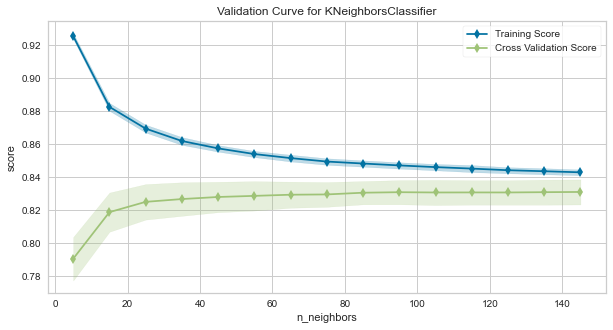

<Figure size 432x288 with 0 Axes>

In [318]:
fig, ax = plt.subplots(figsize=(10, 5))
val_curve = ValidationCurve(KNeighborsClassifier(),
                      param_name='n_neighbors',
                      param_range=n_neighbors,
                      cv=n_folds,
                      scoring=scoring,
#                       n_jobs=-1,
                      ax=ax)
val_curve.fit(X, y_binary)
val_curve.poof()
sns.despine()
fig.tight_layout();

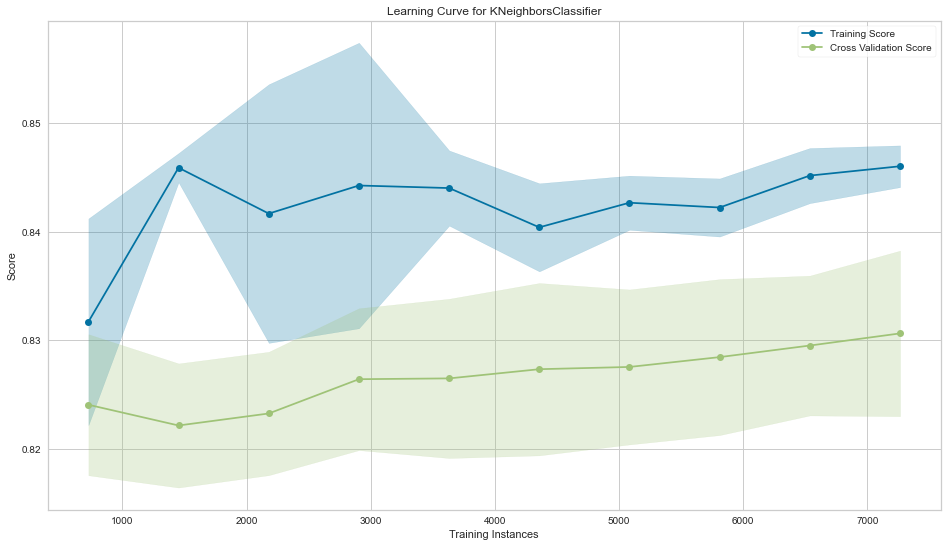

<Figure size 432x288 with 0 Axes>

In [319]:
fig, ax = plt.subplots(figsize=(16, 9))
l_curve = LearningCurve(KNeighborsClassifier(n_neighbors=best_k), 
                        train_sizes=np.arange(.1, 1.01, .1),
                        scoring=scoring, 
                        cv=5, 
                        n_jobs=-1,
                        ax=ax)
l_curve.fit(X, y_binary)
l_curve.poof()
sns.despine()
fig.tight_layout();

In [341]:
from sklearn.metrics import (classification_report,
                             accuracy_score,
                             zero_one_loss,
                             roc_auc_score,
                             roc_curve,
                             brier_score_loss,
                             cohen_kappa_score,
                             confusion_matrix,
                             fbeta_score,
                             hamming_loss,
                             hinge_loss,
                             jaccard_score,
                             log_loss,
                             matthews_corrcoef,
                             f1_score,
                             average_precision_score,
                             precision_recall_curve)

In [342]:
y_score = cross_val_predict(KNeighborsClassifier(best_k), 
                           X=X, 
                           y=y_binary, 
                           cv=5, 
                           n_jobs=-1, 
                           method='predict_proba')[:, 1]

In [343]:
pred_scores = dict(y_true=y_binary,y_score=y_score)

In [344]:
roc_auc_score(**pred_scores)

0.8295282510819151

In [345]:
cols = ['False Positive Rate', 'True Positive Rate', 'threshold']
roc = pd.DataFrame(dict(zip(cols, roc_curve(**pred_scores))))

In [346]:
precision, recall, ts = precision_recall_curve(y_true=y_binary, probas_pred=y_score)
pr_curve = pd.DataFrame({'Precision': precision, 'Recall': recall})

In [347]:
f1 = pd.Series({t: f1_score(y_true=y_binary, y_pred=y_score>t) for t in ts})
best_threshold = f1.idxmax()

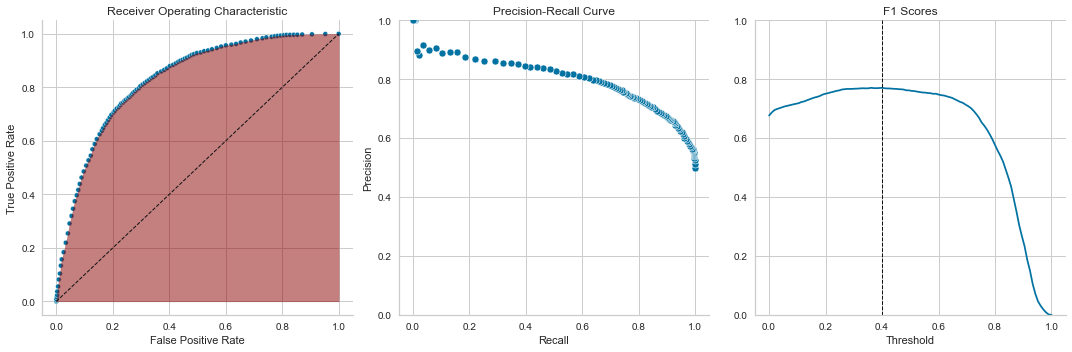

In [348]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

ax = sns.scatterplot(x='False Positive Rate', y='True Positive Rate', data=roc, size=5, legend=False, ax=axes[0])
axes[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), color='k', ls='--', lw=1)
axes[0].fill_between(y1=roc['True Positive Rate'], x=roc['False Positive Rate'], alpha=.5,color='darkred')
axes[0].set_title('Receiver Operating Characteristic')


sns.scatterplot(x='Recall', y='Precision', data=pr_curve, ax=axes[1])
axes[1].set_ylim(0,1)
axes[1].set_title('Precision-Recall Curve')


f1.plot(ax=axes[2], title='F1 Scores', ylim=(0,1))
axes[2].set_xlabel('Threshold')
axes[2].axvline(best_threshold, lw=1, ls='--', color='k')
#axes[2].text(text=f'Max F1 @ {best_threshold:.2f}', x=.75, y=.95, s=5)
sns.despine()
fig.tight_layout();

In [349]:
average_precision_score(y_true=y_binary, y_score=y_score)

In [359]:
y_pred = y_score > best_threshold

In [350]:
brier_score_loss(y_true=y_binary, y_prob=y_score)

0.16857838113218857

In [360]:
scores = dict(y_true=y_binary, y_pred=y_pred)

In [361]:

fbeta_score(**scores, beta=1)

0.7713004484304933

In [362]:
print(classification_report(**scores))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      4540
           1       0.70      0.85      0.77      4540

    accuracy                           0.75      9080
   macro avg       0.76      0.75      0.74      9080
weighted avg       0.76      0.75      0.74      9080



In [363]:
confusion_matrix(**scores)

array([[2915, 1625],
       [ 670, 3870]], dtype=int64)

In [364]:
accuracy_score(**scores)

0.7472466960352423

In [365]:
zero_one_loss(**scores)

0.2527533039647577

In [367]:
'Fraction of labels that are incorrectly predicted'

hamming_loss(**scores)

0.2527533039647577

In [368]:
'Score that expresses the level of agreement between two annotators on a classification problem.'



cohen_kappa_score(y1=y_binary, y2=y_pred)

0.4944933920704846

In [369]:
hinge_loss(y_true=y_binary, pred_decision=y_pred)

0.7527533039647577

In [370]:
jaccard_score(**scores)

0.6277372262773723

In [371]:
log_loss(**scores)

8.729932948474017

In [372]:
matthews_corrcoef(**scores)

0.5058105890272171

In [373]:
## Multi-Class


y_multi = pd.qcut(y, q=3, labels=[0,1,2])

In [374]:
n_neighbors = tuple(range(5, 151, 10))
n_folds = 5
scoring = 'accuracy'

In [375]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': n_neighbors}

estimator = GridSearchCV(estimator=pipe,
                         param_grid=param_grid,
                         cv=n_folds,
                         n_jobs=-1
                        )
estimator.fit(X=X, y=y_multi)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': (5, 15, 25, 35, 45, 55, 65, 75, 85,
                                              95, 105, 115, 125, 135, 145)})

In [376]:
y_pred = cross_val_predict(estimator.best_estimator_, 
                           X=X, 
                           y=y_multi, 
                           cv=5, 
                           n_jobs=-1, 
                           method='predict')

In [377]:
print(classification_report(y_true=y_multi, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      3027
           1       0.50      0.41      0.45      3026
           2       0.60      0.67      0.64      3027

    accuracy                           0.61      9080
   macro avg       0.60      0.61      0.60      9080
weighted avg       0.60      0.61      0.60      9080

